# WeatherPy
----


# Anaylsis
----

* On the 13th of April 2022 in the northern hemisphere there was a stronger relasionship between proximity to the equator and 
  higher tempretures than could be seen in the southern hemisphere.
* There was no strong relasionship between lattitude and wind speed.
* There was no strong relationship between latitude and humidity or cloudiness.

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from citipy import citipy

# Import API key from file
from api_keys import weather_api_key


# Output File (CSV)
output_data_file = "../output_data/cities.csv"



In [2]:
output_data_file

'../output_data/cities.csv'

## Generate Cities List

In [3]:
# Create empty lists for lattitude and longitude and for city names
lat_lngs = []
cities = []

# define the ranges of lattitude and longitude and save into variables
lat_range = (-90, 90)
lng_range = (-180, 180)

# using numpy generate 1500 randon number combinations within the defined ranges to ensure sufficient to achieve a minimum of 500 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

# zip the to list together and save into variable lats_lngs
lats_lngs = zip(lats, lngs)

# Loop through the lats_lngs series using the citipy.nearest_city function to find the city_name of the nearest city
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city_name doesnt already exist then add it to the cities list
    if city not in cities:
        cities.append(city)

# Using the len() function count the number of cities in the list to ensure that it is over 500
len(cities)

615

In [10]:
print(cities)

['guarapari', 'cidreira', 'kapaa', 'tsihombe', 'kempele', 'hilo', 'saint-philippe', 'rikitea', 'shirgaon', 'mataura', 'logumkloster', 'veshenskaya', 'krasnoselkup', 'ketchikan', 'mar del plata', 'upernavik', 'yellowknife', 'egvekinot', 'otradnoye', 'cape town', 'east london', 'kuche', 'bluff', 'belyy yar', 'atuona', 'sonoita', 'dhuburi', 'provideniya', 'lalomanu', 'clyde river', 'belushya guba', 'moquegua', 'avarua', 'hermanus', 'hobyo', 'busselton', 'puerto ayora', 'mao', 'correntina', 'vostok', 'hamilton', 'shitanjing', 'bengkulu', 'nizhniy kuranakh', 'khatanga', 'sarkand', 'thompson', 'victoria', 'nikolskoye', 'ilulissat', 'kodiak', 'sentyabrskiy', 'chumikan', 'samana', 'tiksi', 'doka', 'new norfolk', 'souillac', 'lahij', 'tasiilaq', 'port alfred', 'ola', 'araouane', 'nanortalik', 'wulanhaote', 'ribeira grande', 'korla', 'esperance', 'fort saint john', 'taolanaro', 'matsanga', 'vaini', 'airai', 'mustasaari', 'taft', 'vorsma', 'ushuaia', 'laguna', 'pevek', 'tarana', 'awbari', 'camapu

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create the URL for the Weather Map API Call requesting imperial measurments and adding the api key from my api_keys file

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# # print url to check
print(url)

# create an empty list for the results of the api call
city_data = []

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=36426fe7b8f897a2610ab86f3f9f9741


In [5]:
len(city_data)

0

In [6]:
#Print an opening statement to log each city as it's being processed, with the city number and city name.  
print("Retrieving cities     ")
print("-----------------------------")

# Create counters to track how many api calls have been done 
call_counter = 1
set_counter = 1

# loop through the cities list
for i, city in enumerate(cities):
    
# Grouping the calls in sets of 20
     if (i % 20 == 0 and i >= 20):
         set_counter += 1
         call_counter = 0    

# Create the endpoint URL with each city_name added 
     city_url = url + "&q=" + city
    
# Log and print the url call number and city
     print("Processing call %s of Set %s | %s" % (call_counter, set_counter, city))
         
    # Add 1 to the call counter
     call_counter += 1
        
     # Run an API request for each of the cities, use try/except to ensure that the code continues to run when a city isnt found
     try:
         # retrieve the data as a Json
         city_weather = requests.get(city_url).json()

         # retrieve the lattitude, longitude, max temp, cloudiness, wind speed & humidity plus the country and date. save to variables
         city_lat = city_weather["coord"]["lat"]
         city_lng = city_weather["coord"]["lon"]
         city_max_temp = city_weather["main"]["temp_max"]
         city_humidity = city_weather["main"]["humidity"]
         city_clouds = city_weather["clouds"]["all"]
         city_wind = city_weather["wind"]["speed"]
         city_country = city_weather["sys"]["country"]
         city_date = city_weather["dt"]

         # Append the City information into city_data list
         city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

     # print exception statement  
     except:
         print("Unable to retrive weather data. Skip to the next city...")
         pass
                      

                    

Retrieving cities     
-----------------------------
Processing call 1 of Set 1 | pevek
Processing call 2 of Set 1 | san cristobal
Processing call 3 of Set 1 | macamic
Processing call 4 of Set 1 | ilulissat
Processing call 5 of Set 1 | mar del plata
Processing call 6 of Set 1 | college
Processing call 7 of Set 1 | salalah
Processing call 8 of Set 1 | khatanga
Processing call 9 of Set 1 | bethel
Processing call 10 of Set 1 | yashkul
Processing call 11 of Set 1 | kruisfontein
Processing call 12 of Set 1 | ambalema
Processing call 13 of Set 1 | punta arenas
Processing call 14 of Set 1 | victoria
Processing call 15 of Set 1 | jamestown
Processing call 16 of Set 1 | zapolyarnyy
Processing call 17 of Set 1 | vostok
Processing call 18 of Set 1 | ushuaia
Processing call 19 of Set 1 | troina
Processing call 20 of Set 1 | atambua
Processing call 0 of Set 2 | port arthur
Processing call 1 of Set 2 | mataura
Processing call 2 of Set 2 | azangaro
Processing call 3 of Set 2 | aswan
Processing call 4

Processing call 11 of Set 10 | paranapanema
Processing call 12 of Set 10 | trairi
Processing call 13 of Set 10 | luderitz
Processing call 14 of Set 10 | marquette
Processing call 15 of Set 10 | roma
Processing call 16 of Set 10 | vallenar
Processing call 17 of Set 10 | vao
Processing call 18 of Set 10 | raton
Processing call 19 of Set 10 | zalantun
Processing call 0 of Set 11 | sao joao da barra
Processing call 1 of Set 11 | yumen
Processing call 2 of Set 11 | kuytun
Processing call 3 of Set 11 | mitsamiouli
Processing call 4 of Set 11 | chingirlau
Processing call 5 of Set 11 | mayor pablo lagerenza
Processing call 6 of Set 11 | honiara
Processing call 7 of Set 11 | nara
Processing call 8 of Set 11 | caravelas
Processing call 9 of Set 11 | fairbanks
Processing call 10 of Set 11 | nome
Processing call 11 of Set 11 | cayenne
Processing call 12 of Set 11 | pangnirtung
Processing call 13 of Set 11 | alofi
Processing call 14 of Set 11 | chinsali
Processing call 15 of Set 11 | belushya guba


Processing call 19 of Set 19 | bandarbeyla
Processing call 0 of Set 20 | sinnamary
Processing call 1 of Set 20 | maceio
Processing call 2 of Set 20 | pemangkat
Processing call 3 of Set 20 | la ronge
Processing call 4 of Set 20 | baiyin
Processing call 5 of Set 20 | san policarpo
Processing call 6 of Set 20 | bealanana
Processing call 7 of Set 20 | atar
Processing call 8 of Set 20 | kyra
Processing call 9 of Set 20 | cabadiangan
Processing call 10 of Set 20 | dunedin
Processing call 11 of Set 20 | bargal
Unable to retrive weather data. Skip to the next city...
Processing call 12 of Set 20 | alotau
Unable to retrive weather data. Skip to the next city...
Processing call 13 of Set 20 | cancun
Processing call 14 of Set 20 | dryden
Processing call 15 of Set 20 | chateau-thierry
Processing call 16 of Set 20 | tevaitoa
Processing call 17 of Set 20 | manadhoo
Processing call 18 of Set 20 | gorno-chuyskiy
Unable to retrive weather data. Skip to the next city...
Processing call 19 of Set 20 | me

Processing call 7 of Set 29 | batagay-alyta
Processing call 8 of Set 29 | humaita
Processing call 9 of Set 29 | kiunga
Processing call 10 of Set 29 | anuradhapura
Processing call 11 of Set 29 | salamiyah
Processing call 12 of Set 29 | japura
Processing call 13 of Set 29 | soeng sang
Processing call 14 of Set 29 | hamilton
Processing call 15 of Set 29 | den helder
Processing call 16 of Set 29 | okandja
Unable to retrive weather data. Skip to the next city...
Processing call 17 of Set 29 | talara
Processing call 18 of Set 29 | sabang
Processing call 19 of Set 29 | amazar
Processing call 0 of Set 30 | sirari
Processing call 1 of Set 30 | voskresenskoye
Processing call 2 of Set 30 | sept-iles
Processing call 3 of Set 30 | te anau
Processing call 4 of Set 30 | acarau
Processing call 5 of Set 30 | gazanjyk
Processing call 6 of Set 30 | kita
Processing call 7 of Set 30 | ambodifototra
Unable to retrive weather data. Skip to the next city...
Processing call 8 of Set 30 | kadykchan
Unable to re

In [7]:
# Check the length of the city_data list to ensure that it is over 500
len(city_data)

563

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Convert the city_data array into a Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [9]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pevek,69.7008,170.3133,4.05,87,100,1.03,RU,1649831944
1,san cristobal,7.7669,-72.2250,68.11,74,100,2.37,VE,1649831944
2,macamic,48.7502,-78.9996,32.88,88,100,1.99,CA,1649831944
3,ilulissat,69.2167,-51.1000,21.22,93,75,11.50,GL,1649831944
4,mar del plata,-38.0023,-57.5575,51.10,87,2,11.99,AR,1649831944


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Display the statistical values 
city_data_pd.describe()
# There are no cities in the data with humidity over 100


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.299631,19.526894,60.663002,69.420959,56.847247,8.389947,1.649832e+09
std,33.519103,90.284294,22.621173,21.768322,40.116974,5.740415,5.535751e+01
min,-54.800000,-179.166700,-2.180000,1.000000,0.000000,0.000000,1.649832e+09
25%,-9.269700,-60.152550,44.895000,58.000000,15.500000,4.060000,1.649832e+09
50%,21.346900,24.662200,65.910000,73.000000,68.000000,6.910000,1.649832e+09
75%,48.000000,100.928950,78.510000,86.000000,100.000000,11.540000,1.649832e+09
max,78.218600,179.316700,108.750000,100.000000,100.000000,28.770000,1.649832e+09


In [11]:
# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pevek,69.7008,170.3133,4.05,87,100,1.03,RU,1649831944
1,san cristobal,7.7669,-72.2250,68.11,74,100,2.37,VE,1649831944
2,macamic,48.7502,-78.9996,32.88,88,100,1.99,CA,1649831944
3,ilulissat,69.2167,-51.1000,21.22,93,75,11.50,GL,1649831944
4,mar del plata,-38.0023,-57.5575,51.10,87,2,11.99,AR,1649831944
...,...,...,...,...,...,...,...,...,...
558,palana,59.1167,159.9667,19.13,94,100,12.03,RU,1649831997
559,mattru,7.6244,-11.8332,74.32,94,100,1.36,SL,1649831997
560,broken hill,-31.9500,141.4333,76.71,19,0,12.66,AU,1649831997
561,donetsk,48.0000,37.8000,38.07,92,100,12.62,UA,1649831772


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

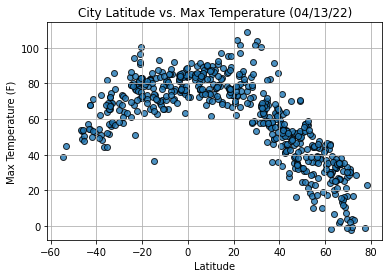

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs. Temperature Plot.png")

# Show plot
plt.show()

### The latitude vs Max tempreture plot shows a stronger correlation between higher tempreture and proximity to the equator in the northern hemisphere than in the southern.

## Latitude vs. Humidity Plot

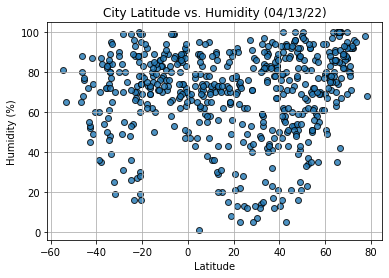

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs. Humidity Plot.png")

# Show plot
plt.show()

### The Latitude vs Humidity Plot shows no clear correlation between proximity to the equator and higher levels of humidity but there is noticably more cities with low humidity in the northern hemipshere but this could be as a result of the city selection.

## Latitude vs. Cloudiness Plot

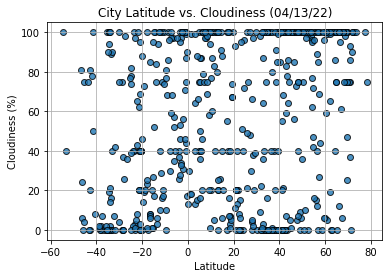

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs. Cloudiness Plot.png")

# Show plot
plt.show()

### The Latitude vs Cloudiness Plot shows no correlation between proximity to the equator and cloudiness, similar to the previous plot there is a stronger cluster of clear sky cities in the northern hemisphere but this could be as a result of city selection.

## Latitude vs. Wind Speed Plot

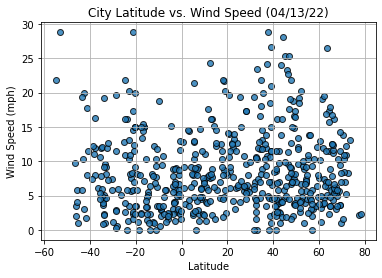

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs. Wind Speed Plot.png")

# Show plot
plt.show()


### The Latitude vs. Wind speed plot shows no correlation between proximity to the equator and wind speed.

## Linear Regression

In [16]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run the regresson
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

The r-value is: 0.7661089603529483


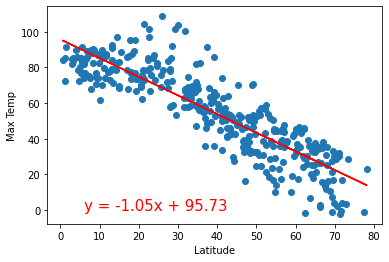

<function matplotlib.pyplot.show(close=None, block=None)>

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,0))
plt.show

####  There is a strong corrolation between latitude and Max Tempreture so on the 13th of April in the Northern hemisphere it would have been possible to estimate the maximum tempreture (y) of a city based on its latitude (x) with a good level of certainty using the formula on the plot.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4006129253397977


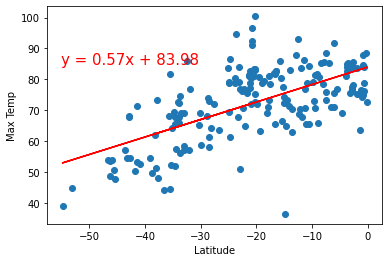

<function matplotlib.pyplot.show(close=None, block=None)>

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 85))
plt.show

####  There is a weaker correlation between latitude and max tempreture so on the 13th of April in the Sorthern hemisphere it would have been possible to estimate the maximum tempreture (y) of a city based on its latitude (x) with a reasonable level of certainty using the formula on the plot.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06631078843367705


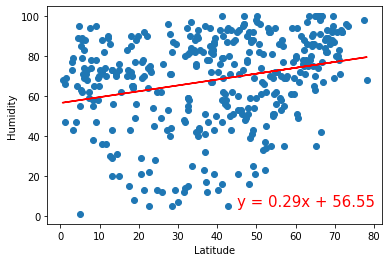

<function matplotlib.pyplot.show(close=None, block=None)>

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(45,5))
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04815399594128892


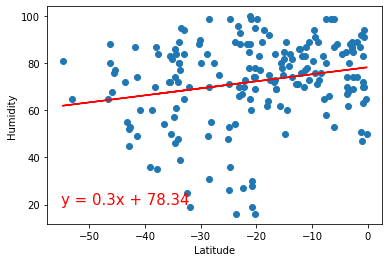

<function matplotlib.pyplot.show(close=None, block=None)>

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-55, 20))
plt.show

####  There is no correlation between latitude and humidity so on the 13th of April it would not have been possible to predict the humitity of a city in either hemisphere with an acceptable level of certainty.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.054993056116547666


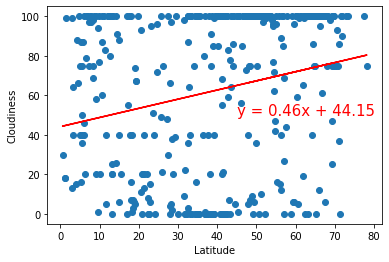

<function matplotlib.pyplot.show(close=None, block=None)>

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (45,50))
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07493640004127336


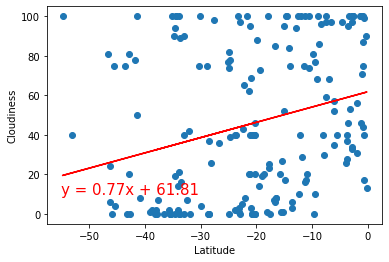

<function matplotlib.pyplot.show(close=None, block=None)>

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-55,10))
plt.show

#### There is no correlation between lattitude and cloudiness so on the 13th of April it would not have been possible to predict the cloudiness of a city in either hemisphere with an acceptable level of certainty.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00014839737443779618


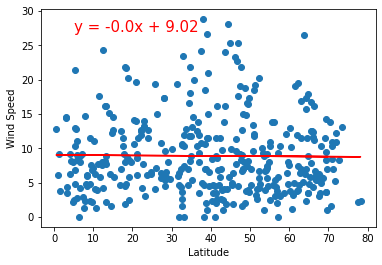

<function matplotlib.pyplot.show(close=None, block=None)>

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (5,27))
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06272260205091544


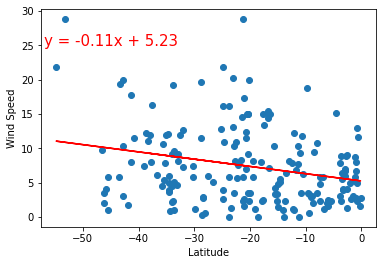

<function matplotlib.pyplot.show(close=None, block=None)>

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-57, 25))
plt.show

#### There is no correlation between latitude and wid speed so on the 13th of April it would not have been possible to predict the wind speed of a city in either hemisphere with an acceptable level of certainty.